# CS 168- Homework 2 ---  Created By Ali Hatamizadeh

*   In order to recieve credit for each section, you **MUST** visualize the results. 

*   The maximum points for this homework is **150 points**.





### (0 Points)  Load the image


The shape of the image is: (512, 512, 3) 


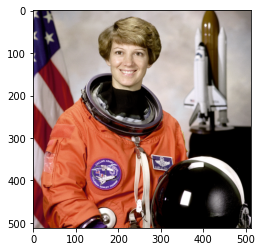

In [0]:
import scipy
from scipy import misc
import numpy as np
from matplotlib import pyplot as plt
from skimage.data import astronaut

img = astronaut()

plt.figure()
plt.imshow(img)

print('The shape of the image is: {} '.format(np.shape(img)))

### (10 Points) Gray-scale conversion 
---

Convert the image to Grayscale using:

$$L = R * 0.2989 + G * 0.5870 + B * 0.1140$$

Where $R,G,B$ represent the red (first), green (second) and blue (third) channels. 

**Visualize** the results. 

Your output should look like the provided image. 


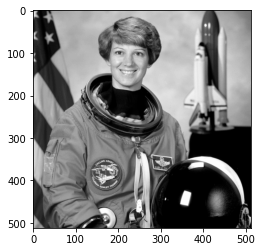

The shape of the gray image is: (512, 512) 


In [0]:
def rgb2gray(img):
    




    return L






print('The shape of the gray image is: {} '.format(np.shape(img_gray)))


### (30 Points) Gaussian Filter Implementation (from scratch)


---

A Gaussian filter can be defined as

$$G_{\sigma}=\dfrac{1}{2\pi\sigma^{2}}e^{-\dfrac{x^{2}+y^2}{2\sigma^{2}}}$$

Implement a function that accepts as an input the standard deviation $\sigma$ and a filter size. 

Using this function, create a 7×7 Gaussian filter with $\sigma=4$. Then, perform a convolution operation where the gray scaled image ( from the previous section) is convoled with this 7×7 Gaussian filter. 

In this section, you can use convolution functionality of scipy ( signal package) as documented in this [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html). 

Hint 1: For creating the Gaussian filter, use numpy.mgrid to create a grid of x and y cooridnates. Once the x and y coordinates have been created, they can be readily passed to $G_{\sigma}$. 

Hint2: When using the convolution, use the " same " padding. 

**Visualize** the results. 

Your output should look like the provided image. 

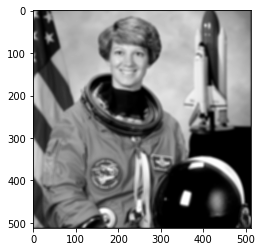

In [0]:
import math

def Gaussian(size,sigma):

  








  return G







### (30 Points) Implementing 2D Convolution (from scratch)

---

If $x$ representes an image and $h$ a kernel of size $2k+1\times2k+1$, a convolution operation can be defined as   


$$y[m,n]=\sum_{j=-k}^{k} \sum_{i=-k}^{k} x[i,j] h[m-i,n-j]$$

Implement a function that takes an input image and filter as its input arguments and returns a convolved image. 

It is assumed that this function performs a convolution with stride of one and "same" zero padding. 

You need to pass in the astronaut image and the **Guassian kernel** that you **implemented** in the previous section as the inputs and test your implementation.

**Visualize** the results. 

Your output should look like the provided image. 

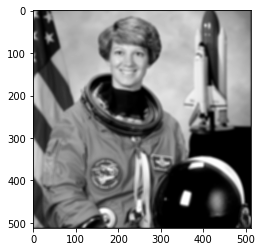

In [0]:
def CONV_2D(image, kernel):
  

















  return output







### (30 Points) Edge Detection
---

( 10 points) Using your **own convolution implementation** from the previous section, [convolve](https://en.wikipedia.org/wiki/Convolution) the **blurred image** with a horizontal [sobel operator](https://en.wikipedia.org/wiki/Sobel_operator) ($G_{X})$.

**Visualize** the results. 

Your output should look like the provided image. 

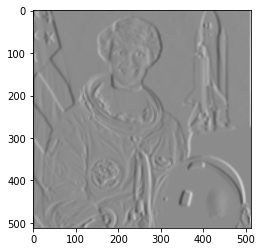

(20 points) Write a function that takes as an input, the **blured image** that you created in the previous section (output of convolution with Gaussian) and return the magnitude of gradient of image according to

$$I=\sqrt{I_{X}^{2}+I_{Y}^{2}}$$

The output of this function should be the detected edges. 

Hints: Follow these steps for implementing such a function:


*   Compute $I_{X}$ by [convolving](https://en.wikipedia.org/wiki/Convolution) the image with a horizontal [sobel operator](https://en.wikipedia.org/wiki/Sobel_operator) ($G_{X})$.
*   Compute $I_{Y}$ by [convolving](https://en.wikipedia.org/wiki/Convolution) the image with a vertical [sobel operator](https://en.wikipedia.org/wiki/Sobel_operator) ($G_{Y})$.
*   Simply use the numpy.hypot function to calculate $I$ using the computed $I_{X}$ and $I_{Y}$. 

For convolution operations, you need to use your **own convolution implementation** from the previous section. 


**Visualize** the results. 

Your output should look like the provided image. 

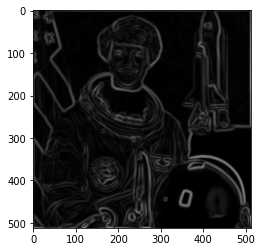

In [0]:
def grad(img):

  















  return G








### (50 Points) Image Transformation 
---

Using the loaded moon image below: 

Implement a function from scratch that accept this image as well as a rotation angle. This function should **first** reduce the size of the image by **half** ( scales its height and width by 0.5) and then **rotate** the rescaled image by **180 degrees** about **its center**.

Note: The rotation and scaling operations needs to be **implemented from scratch**. 

Hint 1: First you need to implement the functions that return the affine transform of different operations such as rotation, transformations and scaling aroundn the origin ( the 3 by 3 matrices that were introduced during the lecture). 

Hint 2: Next, for a dersired operation (e.g. rotation about the center of the image), try to come up with the series of affine transformation that achieves it. Subsequently, you need to construct the final affine transform that allows scaling and rotation about the center of the image.  

Hint 3: Once the final affine transform is achieved, you need it to loop through all the pixels in the image and apply the transofrmation to find the new coordinates. 

Hint 4: At last, you need to do bilinear interpolation and find the corresponding pixel values for the newly calculated coordinates. You can use the following bilinear transformation function for this step. 


**Visualize** the results. 

Your output should look like the provided image. 

This is the initial image:


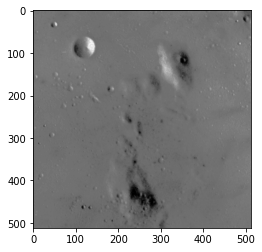

This is how the transformed image should look like:


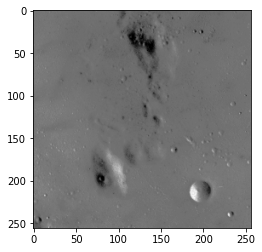

In [0]:
import scipy
from scipy import misc
import numpy as np
from matplotlib import pyplot as plt
from skimage.data import moon
import math
from numpy.linalg import inv

img=moon()

def interp_bilinear(Z, X, Y):

  H,W = np.shape(Z)

  X[X < 0] = 0
  X[X > W-1]= W-1
  Y[Y < 0] = 0
  Y[Y > H-1] = H-1

  f_val = []

  for x, y in zip(X, Y):

    y_min = math.floor(y)
    y_max = math.ceil(y)
    x_min = math.floor(x)
    x_max = math.ceil(x)

    x=x_max-x
    y=y_max-y

    f=Z[y_min,x_min]*(1-x)*(1-y)+Z[y_min,x_max]*y*(1-x)+Z[y_max,x_min]*(1-y)*x+Z[y_max,x_max]*x*y

    f_val.append(f)

  return f_val













